In [2]:
"""
Created on July 2024
@author: Théotime de la Selle
"""

# import os, sys, time, random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle

import pylcs
import nltk as nl
# from nltk.tokenize import word_tokenize,wordpunct_tokenize
# from nltk.stem import WordNetLemmatizer,PorterStemmer
# from nltk.corpus import words
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# from scipy.signal import correlate

# Load and verify data

In [3]:
Evangiles = pickle.load(open("data/Evangiles.pkl", "rb"))
Mark = pickle.load(open("data/Mark.pkl", "rb"))
Matt = pickle.load(open("data/Matt.pkl", "rb"))
Luke = pickle.load(open("data/Luke.pkl", "rb"))
John = pickle.load(open("data/John.pkl", "rb"))

# Ev_verses = Evangiles.shape[0]
display(Evangiles.sample(5))

,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
701,Matt 21:22,καὶ πάντα ὅσα ἂν αἰτήσητε ἐν τῆι προσευχῆι πισ...,"[καὶ, πάντα, ὅσα, ἂν, αἰτήσητε, ἐν, τῆι, προσε...","[καί, πᾶς, ὅσος, ἄν, αἰτέω, ἐν, τῆι, προσευχῆι...","[πάντα, ὅσα, αἰτήσητε, τῆι, προσευχῆι, πιστεύο...","[ὅσος, αἰτέω, προσευχή, πιστεύω, λήμψεσθε]","[(ὅσος, αἰτέω), (αἰτέω, προσευχή), (προσευχή, ...","[(ὅσος, αἰτέω, προσευχή), (αἰτέω, προσευχή, πι...","[0.40243763009586325, 0.38715389837098324, 0.3...","[coordinating_conjunction, adjective, pronoun,...","[[], [(nominative, accusative, ergative, absol...","[αἰτέω, λήμψεσθε, πιστεύω, προσευχή, ὅσος]"
442,Matt 13:48,ἣν ὅτε ἐπληρώθη ἀναβιβάσαντες ἐπὶ τὸν αἰγιαλὸν...,"[ἣν, ὅτε, ἐπληρώθη, ἀναβιβάσαντες, ἐπὶ, τὸν, α...","[ὅς, ὅτε, πληρόω, ἀναβιβάζω, ἐπί, ὁ, αἰγιαλός,...","[ὅτε, ἐπληρώθη, ἀναβιβάσαντες, αἰγιαλὸν, καθίσ...","[πληρόω, ἀναβιβάζω, αἰγιαλὸν, καθίζω, σύνλέγω1...","[(πληρόω, ἀναβιβάζω), (ἀναβιβάζω, αἰγιαλὸν), (...","[(πληρόω, ἀναβιβάζω, αἰγιαλὸν), (ἀναβιβάζω, αἰ...","[0.24640720904980185, 0.2321659150914162, 0.22...","[pronoun, subordinating_conjunction, verb, ver...","[[(nominative, accusative, ergative, absolutiv...","[αἰγιαλὸν, βάλλω, καθίζω, καλός, πληρόω, σαπρὰ..."
3542,John 14:30,οὐκέτι πολλὰ λαλήσω μεθ ὑμῶν ἔρχεται γὰρ ὁ τοῦ...,"[οὐκέτι, πολλὰ, λαλήσω, μεθ, ὑμῶν, ἔρχεται, γὰ...","[οὐκέτι, πολύς, λαλέω, μεθ, ὑμεῖς, ἔρχομαι, γά...","[οὐκέτι, πολλὰ, λαλήσω, μεθ, ὑμῶν, ἔρχεται, κό...","[οὐκέτι, πολύς, λαλέω, ἔρχομαι, κόσμος, ἄρχων,...","[(οὐκέτι, πολύς), (πολύς, λαλέω), (λαλέω, ἔρχο...","[(οὐκέτι, πολύς, λαλέω), (πολύς, λαλέω, ἔρχομα...","[0.270266912796393, 0.23554802008617184, 0.299...","[adverb, adjective, verb, adverb, pronoun, ver...","[[(pos, neg)], [(nominative, accusative, ergat...","[κόσμος, λαλέω, οὐδείς, οὐκέτι, πολύς, ἄρχων, ..."
883,Matt 25:23,ἔφη αὐτῶι ὁ κύριος αὐτοῦ εὖ δοῦλε ἀγαθὲ καὶ πι...,"[ἔφη, αὐτῶι, ὁ, κύριος, αὐτοῦ, εὖ, δοῦλε, ἀγαθ...","[φημί, αὐτῶι, ὁ, κύριος, αὐτός, εὖ, δοῦλος, ἀγ...","[ἔφη, αὐτῶι, κύριος, αὐτοῦ, εὖ, δοῦλε, ἀγαθὲ, ...","[φημί, κύριος, αὐτός, εὖ, δοῦλος, ἀγαθός, πισ...","[(φημί, κύριος), (κύριος, αὐτός), (αὐτός, εὖ),...","[(φημί, κύριος, αὐτός), (κύριος, αὐτός, εὖ), (...","[0.06839458435145454, 0.09365072899437385, 0.3...","[verb, adjective, determiner, noun, pronoun, a...","[[(habitual, imperfective, iterative, perfecti...","[αὐτός, δοῦλος, εἰμί, εἰσέρχομαι, εὖ, καθίστη..."
2629,Luke 20:4,τὸ βάπτισμα ἰωάννου ἐξ οὐρανοῦ ἦν ἢ ἐξ ἀνθρώπων,"[τὸ, βάπτισμα, ἰωάννου, ἐξ, οὐρανοῦ, ἦν, ἢ, ἐξ...","[ὁ, βάπτισμα, ἰωάν(ν)ης, ἐκ, οὐρανός, εἰμί, ἤ,...","[βάπτισμα, ἰωάννου, οὐρανοῦ, ἦν, ἀνθρώπων]","[βάπτισμα, ιὤαννης, οὐρανός, εἰμί, ἄνθρωπος]","[(βάπτισμα, ιὤαννης), (ιὤαννης, οὐρανός), (οὐρ...","[(βάπτισμα, ιὤαννης, οὐρανός), (ιὤαννης, οὐραν...","[0.21757523139410653, 0.4354834627698506, 0.64...","[determiner, noun, verb, adposition, noun, aux...","[[(nominative, accusative, ergative, absolutiv...","[βάπτισμα, εἰμί, ιὤαννης, οὐρανός, ἄνθρωπος]"


# Edit distance test on 2 verses

In [9]:
# Edit distance test on verses
id_verse_1 = "Luke 9:22"
# id_verse_2 = "Matt 16:21"
id_verse_2 = "Mark 8:31"
# id_verse_2 = "Mark 9:31"


def extract_verse(id_verse,df):   
    extracted_verse = df[df.verses == id_verse].reset_index(drop=True)
    display(extracted_verse)
    return extracted_verse

# Find the verses in dataframes
v_1 = extract_verse(id_verse_1,Evangiles)
v_2 = extract_verse(id_verse_2,Evangiles)

def compute_distance(v_1,v_2,method,info=False,transpos=False):
    str_v1 = v_1[method][0]
    len_v1 = len(str_v1)
    str_v2 = v_2[method][0]
    len_v2 = len(str_v2)
   
    # Compute edit distance (characters)
    edit_dist = (nl.edit_distance(str_v1, str_v2,transpositions=transpos)-abs(len_v1-len_v2))/min(len_v1,len_v2)  # Normalized distance 1
    # edit_dist = 1-(pylcs.lcs_sequence_length(str_v1,str_v2)-abs(len_v1-len_v2))/min(len_v1,len_v2)

    # edit_dist = (nl.edit_distance(str_v1, str_v2,transpositions=transpos))/np.max([len_v1,len_v2])  # Normalized distance  2  
    # edit_dist = (nl.edit_distance(str_v1, str_v2)-abs(len_v1-len_v2))/min(len_v1,len_v2)  # Raw distance (unity : words/characters)

    if info == True:
        print("\n-----",method," -----\n")
        print(str_v1)
        print(str_v2)
        print(f"Edit distance between 2 verses :",edit_dist)
    return edit_dist

compute_distance(v_1,v_2,'text',True)
compute_distance(v_1,v_2,'tokens',True,True)
compute_distance(v_1,v_2,'lemmata',True,True)
compute_distance(v_1,v_2,'tokens_filtered',True,True)
compute_distance(v_1,v_2,'lemmata_filtered',True,True)
compute_distance(v_1,v_2,'pos',True,True)
compute_distance(v_1,v_2,'morpho',True,True)
compute_distance(v_1,v_2,'vocabulary',True,True)

,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
0,Luke 9:22,εἰπὼν ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθε...,"[εἰπὼν, ὅτι, δεῖ, τὸν, υἱὸν, τοῦ, ἀνθρώπου, πο...","[λέγω, ὅτι, δεῖ, ὁ, υἱός, ὁ, ἄνθρωπος, πολύς, ...","[εἰπὼν, δεῖ, υἱὸν, ἀνθρώπου, πολλὰ, παθεῖν, ἀπ...","[εἶπον, υἱός, ἄνθρωπος, πολύς, πάσχω, ἀποδοκιμ...","[(εἶπον, υἱός), (υἱός, ἄνθρωπος), (ἄνθρωπος, π...","[(εἶπον, υἱός, ἄνθρωπος), (υἱός, ἄνθρωπος, πολ...","[0.20768776823374044, 0.21975362111698, 0.2688...","[verb, subordinating_conjunction, verb, determ...","[[(habitual, imperfective, iterative, perfecti...","[γραμματεύς, εἶπον, πάσχω, πολύς, πρέσβυς, τρί..."


,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
0,Mark 8:31,καὶ ἤρξατο διδάσκειν αὐτοὺς ὅτι δεῖ τὸν υἱὸν τ...,"[καὶ, ἤρξατο, διδάσκειν, αὐτοὺς, ὅτι, δεῖ, τὸν...","[καί, ἄρχω, διδάσκω, αὐτός, ὅτι, δεῖ, ὁ, υἱός,...","[ἤρξατο, διδάσκειν, αὐτοὺς, δεῖ, υἱὸν, ἀνθρώπο...","[ἄρχω, διδάσκω, αὐτός, υἱός, ἄνθρωπος, πολύς, ...","[(ἄρχω, διδάσκω), (διδάσκω, αὐτός), (αὐτός, υἱ...","[(ἄρχω, διδάσκω, αὐτός), (διδάσκω, αὐτός, υἱός...","[0.19473592611178892, 0.08473834811934751, 0.2...","[coordinating_conjunction, verb, verb, pronoun...","[[], [(habitual, imperfective, iterative, perf...","[αὐτός, γραμματεύς, διδάσκω, πάσχω, πολύς, πρέ..."



----- text  -----

εἰπὼν ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθεῖν καὶ ἀποδοκιμασθῆναι ἀπὸ τῶν πρεσβυτέρων καὶ ἀρχιερέων καὶ γραμματέων καὶ ἀποκτανθῆναι καὶ τῆι τρίτηι ἡμέραι ἐγερθῆναι
καὶ ἤρξατο διδάσκειν αὐτοὺς ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθεῖν καὶ ἀποδοκιμασθῆναι ὑπὸ τῶν πρεσβυτέρων καὶ τῶν ἀρχιερέων καὶ τῶν γραμματέων καὶ ἀποκτανθῆναι καὶ μετὰ τρεῖς ἡμέρας ἀναστῆναι
Edit distance between 2 verses : 0.1144578313253012

----- tokens  -----

['εἰπὼν', 'ὅτι', 'δεῖ', 'τὸν', 'υἱὸν', 'τοῦ', 'ἀνθρώπου', 'πολλὰ', 'παθεῖν', 'καὶ', 'ἀποδοκιμασθῆναι', 'ἀπὸ', 'τῶν', 'πρεσβυτέρων', 'καὶ', 'ἀρχιερέων', 'καὶ', 'γραμματέων', 'καὶ', 'ἀποκτανθῆναι', 'καὶ', 'τῆι', 'τρίτηι', 'ἡμέραι', 'ἐγερθῆναι']
['καὶ', 'ἤρξατο', 'διδάσκειν', 'αὐτοὺς', 'ὅτι', 'δεῖ', 'τὸν', 'υἱὸν', 'τοῦ', 'ἀνθρώπου', 'πολλὰ', 'παθεῖν', 'καὶ', 'ἀποδοκιμασθῆναι', 'ὑπὸ', 'τῶν', 'πρεσβυτέρων', 'καὶ', 'τῶν', 'ἀρχιερέων', 'καὶ', 'τῶν', 'γραμματέων', 'καὶ', 'ἀποκτανθῆναι', 'καὶ', 'μετὰ', 'τρεῖς', 'ἡμέρας', 'ἀναστῆναι']
Edit distan

0.23076923076923078

# Distance matrix computation

In [10]:
test = Mark[Mark.index == 0].reset_index(drop=True)
test['tokens'][0]

['ἀρχὴ', 'τοῦ', 'εὐαγγελίου', 'ἰησοῦ', 'χριστοῦ']

In [11]:
def distance_matrix(df,method,transpos=False):
    len_df = df.shape[0]
    dist_mat = np.ones((len_df,len_df))
    for i in tqdm(range(len_df)):
        for j in range(i,len_df):
            v1 = df[df.index == i].reset_index(drop=True)
            v2 = df[df.index == j].reset_index(drop=True)
            dist_mat[i,j] = compute_distance(v1,v2,method,False,transpos)
    return dist_mat

In [12]:
dist_mat_Ev = [[]]
dist_mat_Ev[0] = distance_matrix(Evangiles,"tokens",False)
dist_mat_Ev.append(distance_matrix(Evangiles,"lemmata",False))
dist_mat_Ev.append(distance_matrix(Evangiles,"lemmata_filtered",False))
# dist_mat_Ev.append(distance_matrix(Evangiles,"bigrams",False))
dist_mat_Ev.append(distance_matrix(Evangiles,"vocabulary",False))
dist_mat_Ev.append(distance_matrix(Evangiles,"pos",False))
# dist_mat_Ev.append(distance_matrix(Evangiles,"morpho",True))

  0%|                                        | 6/3768 [00:23<4:10:22,  3.99s/it]


KeyboardInterrupt: 

In [9]:
# Half matrix value correction and setting NaN for further computations
def triangularMatrix(M):
    length = M[0].shape
    for g in tqdm(range(len(M))):
        for i in range(length[0]):
            for j in range(0,i+1):
                M[g][i][j] = 'NaN'
    return M

dist_mat_Ev = triangularMatrix(dist_mat_Ev)

100%|█████████████████████████████████████████████| 5/5 [00:04<00:00,  1.16it/s]


In [10]:
dist_mat_Mt = [[]]
length_Mt = Matt.shape[0]
for M in dist_mat_Ev:
    dist_mat_Mt.append(M[0:length_Mt,0:length_Mt])

dist_mat_Mc = [[]]
length_Mc = Mark.shape[0]
for M in dist_mat_Ev:
    dist_mat_Mc.append(M[length_Mt:length_Mc+length_Mt,length_Mt:length_Mc+length_Mt])

dist_mat_Lc = [[]]
length_Lc = Luke.shape[0]
for M in dist_mat_Ev:
    dist_mat_Lc.append(M[length_Mc+length_Mt:length_Lc+length_Mt+length_Mc,length_Mc+length_Mt:length_Lc+length_Mt+length_Mc])

dist_mat_Jn = [[]]
length_Jn = John.shape[0]
for M in dist_mat_Ev:
    dist_mat_Jn.append(M[length_Lc+length_Mt+length_Mc:,length_Lc+length_Mt+length_Mc:])

del dist_mat_Mt[0]
del dist_mat_Mc[0]
del dist_mat_Lc[0]
del dist_mat_Jn[0]

# dist_mat_Mt[0] = distance_matrix(Matt,"tokens",True)
# dist_mat_Mt.append(distance_matrix(Matt,"lemmata",True))
# dist_mat_Mt.append(distance_matrix(Matt,"lemmata_filtered",True))
# dist_mat_Mt.append(distance_matrix(Matt,"bigrams",True))
# dist_mat_Mt.append(distance_matrix(Matt,"vocabulary",False))
# dist_mat_Mt.append(distance_matrix(Matt,"pos",True))

# dist_mat_Mc = [[]]
# dist_mat_Mc[0] = distance_matrix(Mark,"tokens",True)
# dist_mat_Mc.append(distance_matrix(Mark,"lemmata",True))
# dist_mat_Mc.append(distance_matrix(Mark,"lemmata_filtered",True))
# dist_mat_Mc.append(distance_matrix(Mark,"bigrams",True))
# dist_mat_Mc.append(distance_matrix(Mark,"vocabulary",False))
# dist_mat_Mc.append(distance_matrix(Mark,"pos",True))

# dist_mat_Lc = [[]]
# dist_mat_Lc[0] = distance_matrix(Luke,"tokens",True)
# dist_mat_Lc.append(distance_matrix(Luke,"lemmata",True))
# dist_mat_Lc.append(distance_matrix(Luke,"lemmata_filtered",True))
# dist_mat_Lc.append(distance_matrix(Luke,"bigrams",True))
# dist_mat_Lc.append(distance_matrix(Luke,"vocabulary",False))
# dist_mat_Lc.append(distance_matrix(Luke,"pos",True))

# dist_mat_Jn = [[]]
# dist_mat_Jn[0] = distance_matrix(John,"tokens",True)
# dist_mat_Jn.append(distance_matrix(John,"lemmata",True))
# dist_mat_Jn.append(distance_matrix(John,"lemmata_filtered",True))
# dist_mat_Jn.append(distance_matrix(John,"bigrams",True))
# dist_mat_Jn.append(distance_matrix(John,"vocabulary",False))
# dist_mat_Jn.append(distance_matrix(John,"pos",True))

# Distance matrix plot

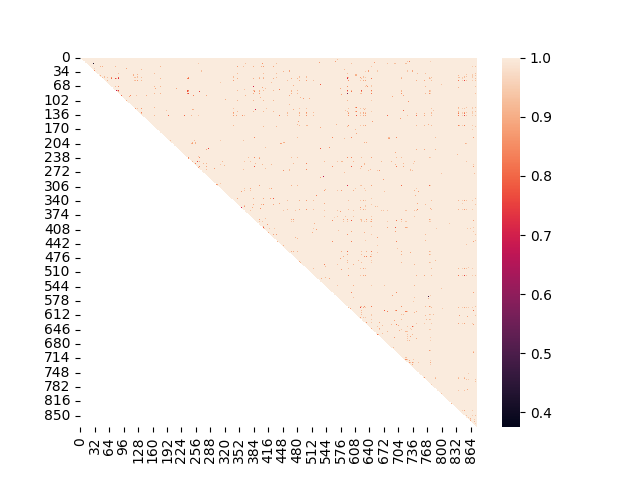

In [15]:
%matplotlib widget
plt.figure()
ax = sns.heatmap(dist_mat_Jn[3], linewidth=0)
plt.show()

# Save in Distance_matrices folder

In [12]:
with open("distance_matrices/dist_mat_Ev.pkl", "wb") as file:
    pickle.dump(dist_mat_Ev, file, protocol=pickle.HIGHEST_PROTOCOL)
with open("distance_matrices/dist_mat_Mc.pkl", "wb") as file:
    pickle.dump(dist_mat_Mc, file, protocol=pickle.HIGHEST_PROTOCOL)
with open("distance_matrices/dist_mat_Mt.pkl", "wb") as file:
    pickle.dump(dist_mat_Mt, file, protocol=pickle.HIGHEST_PROTOCOL)
with open("distance_matrices/dist_mat_Lc.pkl", "wb") as file:
    pickle.dump(dist_mat_Lc, file, protocol=pickle.HIGHEST_PROTOCOL)
with open("distance_matrices/dist_mat_Jn.pkl", "wb") as file:
    pickle.dump(dist_mat_Jn, file, protocol=pickle.HIGHEST_PROTOCOL)